In [20]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
import numpy as np
from scipy import sparse
import torch
import import_ipynb

In [21]:
def mediapipe(path): 
    image=cv2.imread(path)
    image=cv2.resize(image,(600,600))
    annoted_image=image.astype(np.uint8)

    mp_face_mesh=mp.solutions.face_mesh
    connection_tesselation=mp_face_mesh.FACEMESH_TESSELATION
    # print("edges_mediapipe=",len(connection_tesselation),len(connection_tesselation)/2)
    # print(connection_tesselation)
    with mp_face_mesh.FaceMesh(static_image_mode=False,max_num_faces=2,refine_landmarks=True,min_detection_confidence=0.5) as face_mesh:
        results=face_mesh.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

    x_axis=np.empty(len(results.multi_face_landmarks[0].landmark))
    y_axis=np.empty(len(results.multi_face_landmarks[0].landmark))
    i=0

    for nodes in results.multi_face_landmarks[0].landmark:
        x_axis[i]=(results.multi_face_landmarks[0].landmark[i].x)
        y_axis[i]=(results.multi_face_landmarks[0].landmark[i].y)
        i=i+1
    # print(len(results.multi_face_landmarks[0].landmark))

    FEATURE_MATRIX=np.zeros((468,468))
    for i in range(468):
        FEATURE_MATRIX[i][i]=1

    WEIGHTED_ADJACENCY_MATRIX=np.zeros((468,468)) #creating a numpy array of shape 468X468 initialized with zero
    BINARY_ADJACENCY_MATRIX=np.zeros((468,468))

    for edge in connection_tesselation:
        # Determining X & Y axis of Two Connected Points
        x1=x_axis[edge[0]]
        y1=y_axis[edge[0]]
        x2=x_axis[edge[1]]
        y2=y_axis[edge[1]]
        # Calculating Eucleadin Distance for Weighted Graph
        eucleadian_distance=(((x2-x1)**2 + (y2-y1)**2 ) ** 0.5)
        # Creating Weighted Graph
        WEIGHTED_ADJACENCY_MATRIX[edge[0]][edge[1]]=eucleadian_distance
        WEIGHTED_ADJACENCY_MATRIX[edge[1]][edge[0]]=eucleadian_distance

        BINARY_ADJACENCY_MATRIX[edge[0]][edge[1]]=1
        BINARY_ADJACENCY_MATRIX[edge[1]][edge[0]]=1
        # Normalizing axis Values For Visualizing Meash on Face
        shape = image.shape 
        relative_x = int(x1 * shape[1])
        relative_y = int(y1 * shape[0])
        relative_z = int(x2 * shape[1])
        relative_c = int(y2 * shape[0])
        # Drawing Nodes and Edges on Image For Visualization
        cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 0, 255), thickness=3) 
        cv2.line(image,(relative_x,relative_y),(relative_z,relative_c),(0,255,0),1)

    # plt.imshow(image)
    WEIGHTED_ADJACENCY_MATRIX=sparse.csr_matrix(WEIGHTED_ADJACENCY_MATRIX)
    BINARY_ADJACENCY_MATRIX=sparse.csr_matrix(BINARY_ADJACENCY_MATRIX)
    FEATURE_MATRIX=torch.from_numpy(FEATURE_MATRIX)
    DOTPRODUCT=WEIGHTED_ADJACENCY_MATRIX.dot(BINARY_ADJACENCY_MATRIX)
    return(DOTPRODUCT,FEATURE_MATRIX)


Checking mediapipe is running currectly or not

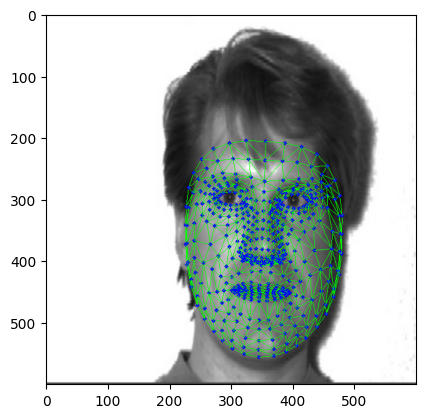

In [22]:
# path="./orl_dataset/person1/train_images/subject01_gif.jpg"
# adj1,features1=mediapipe(path)
# adj2,features2=mediapipe(path)

In [23]:
# adj1=adj1.toarray()
# adj2=adj2.toarray()

In [24]:
# from scipy import spatial
# # z1=z1.detach().numpy()
# # z2=z2.detach().numpy()
# from scipy.stats.stats import pearsonr  
# # cosine_dist=[]
# val1=1 - spatial.distance.cosine(np.array(adj1).flatten() ,np.array(adj2).flatten())
# print("cosine_dist,",(1 - spatial.distance.cosine(np.array(adj1).flatten() ,np.array(adj2).flatten())))
# print("pearson_dist",(pearsonr(np.array(adj1).flatten() ,np.array(adj2).flatten())[0]))
# print("c_dist",(pearsonr(np.array(adj1).flatten() ,np.array(adj2).flatten())[0]))